# Analysis 2
# Analysis on unemployment rate in last 26 years 
- Found Countries with least and most unemployment rate
- Analysed the unemployment based on various factors in the country with least and most unemployment rate.
- Seaborn plot used for displaying the results
- Performed data cleaning and formatted as per requirement for analysis. CSV file included

In [18]:
# import pandas and read csv 
import pandas as pd
import numpy as np

worldBankData = pd.read_csv("/Users/vega/Downloads/WDI_csv/WDI_Data.csv")


In [3]:
#Create function to get the specific indicator names
def get_indicators():
	ind = worldBankData[['Indicator Name']]
	ind = ind.sort_values(by='Indicator Name')
	indicators = ind['Indicator Name'].tolist()
	return indicators

#Create function to get the unemployment indicator names
def get_unemployment_indicators():
	all_ind = get_indicators()
	unemployment = []
	for ind in all_ind:
		if ('unemployment' in ind.lower()):
			unemployment.append(ind)
	return set(unemployment)

#Get the indicators for unemployment from the data
#Print get_unemployment_indicators()
#Based on the indicators available, we shall analyse unemployment based on education, gender and age.

In [5]:
#Keep only data for countries which has value in atleast one year
yearColumns = [col for col in worldBankData.columns if col.isdigit()]
worldBankData = worldBankData.dropna(subset=[yearColumns], how='all')
worldBankData = worldBankData.drop('Unnamed: 61',1)

#Keep data of only last 26 yrs
worldBankData = worldBankData[['Country Name','Indicator Name'] + list(worldBankData.columns[35:])]

In [7]:
# Get values for indicators on unemployment
worldBankData_unemp = worldBankData.loc[worldBankData['Indicator Name'] == 'Unemployment, total (% of total labor force) (national estimate)']
#worldBankData[worldBankData['Indicator Name'].isin('Unemployment, total (% of total labor force) (national estimate)')]

#Keep only countries which have significant amount of data from 1990-2016 so that the analysis is justified.
worldBankData_unemp = worldBankData_unemp[ worldBankData_unemp.isnull().sum(axis=1) < 10]

In [19]:
# Find the average unemployment rate for all countries
worldBankData_unemp['Average unemployment rate'] = worldBankData_unemp.mean(axis=1)

# Find the maximum and minimum employment rate countries
worldBankData_mostUnemp = worldBankData_unemp.sort_values(by = 'Average unemployment rate', ascending=False)
worldBankData_leastUnemp = worldBankData_unemp.sort_values(by ='Average unemployment rate', ascending=True)


In [20]:
#Print the countries with maximum unemployment rate
worldBankData_mostUnemp = worldBankData_mostUnemp[['Country Name','Average unemployment rate']]
worldBankData_mostUnemp.head()

,Country Name,Average unemployment rate
239540,"Macedonia, FYR",33.166667
325208,South Africa,23.828572
378932,West Bank and Gaza,22.376471
72560,Algeria,18.361905
332468,St. Lucia,17.747619


In [11]:
#Print the countries with minimum unemployment rate
worldBankData_leastUnemp = worldBankData_leastUnemp[['Country Name','Average unemployment rate']]
worldBankData_leastUnemp.head()

,Country Name,Average unemployment rate
222116,Kuwait,1.278947
348440,Thailand,1.543478
316496,Singapore,3.195652
243896,Malaysia,3.272727
219212,"Korea, Rep.",3.475000


In [12]:
#Store data for Country with least & most unemployment rate
minMax = [worldBankData_leastUnemp['Country Name'].iloc[0],worldBankData_mostUnemp['Country Name'].iloc[0]]
worldBankDataAnalysis = worldBankData.loc[worldBankData['Country Name'].isin(minMax)]


In [13]:
# Create dataframe with the required columns for analysis

indc_list = ['Unemployment with primary education (% of total unemployment)','Unemployment with secondary education (% of total unemployment)','Unemployment with tertiary education (% of total unemployment)','Unemployment, female (% of female labor force) (national estimate)','Unemployment, male (% of male labor force) (national estimate)']

worldBankDataAnalysis1 = worldBankDataAnalysis[worldBankDataAnalysis['Indicator Name'].isin(indc_list)]

worldBankDataAnalysis1 = worldBankDataAnalysis1.set_index(['Country Name','Indicator Name']).stack().unstack(1)

worldBankDataAnalysis1 = worldBankDataAnalysis1.reset_index()
new_columns = worldBankDataAnalysis1.columns.values;
worldBankDataAnalysis1.columns = ['Country Name', 'Year','Unemployment with primary education (% of total unemployment)','Unemployment with secondary education (% of total unemployment)','Unemployment with tertiary education (% of total unemployment)','Unemployment, female (% of female labor force) (national estimate)','Unemployment, male (% of male labor force) (national estimate)']


In [ ]:
#Write to CSV file
worldBankDataAnalysis1.to_csv('Ana_2.csv')

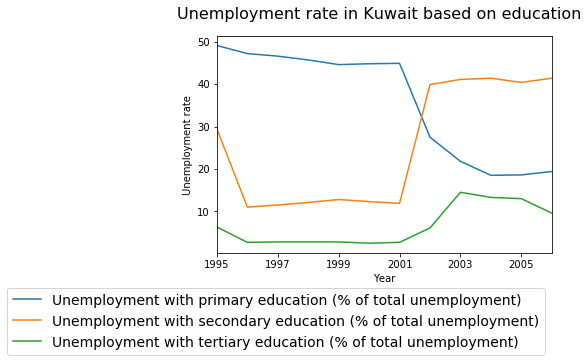

In [14]:
# Import matplotlib

%matplotlib inline
import matplotlib.pyplot as plt

kuwait = worldBankDataAnalysis1.loc[worldBankDataAnalysis1['Country Name'] == 'Kuwait']
kuwait1 = kuwait[['Year','Unemployment with primary education (% of total unemployment)','Unemployment with secondary education (% of total unemployment)','Unemployment with tertiary education (% of total unemployment)']]
kuwait1= kuwait1.dropna() 
kuwait1.set_index('Year').plot()
plt.legend(loc='lower right', bbox_to_anchor=(1, -0.5), fontsize=14)
plt.ylabel('Unemployment rate')

plt.suptitle("Unemployment rate in Kuwait based on education", size=16)
plt.subplots_adjust(top=.88)
plt.savefig("analysis_2.1.png")

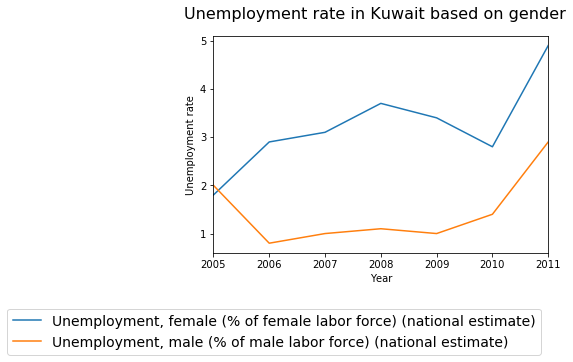

In [15]:
%matplotlib inline

kuwait2 = kuwait[['Year','Unemployment, female (% of female labor force) (national estimate)','Unemployment, male (% of male labor force) (national estimate)']]
kuwait2= kuwait2.dropna() 
kuwait2.set_index('Year').plot()
plt.legend(loc='lower right', bbox_to_anchor=(1, -0.5), fontsize=14)
plt.ylabel('Unemployment rate')
plt.suptitle("Unemployment rate in Kuwait based on gender", size=16)
plt.subplots_adjust(top=.88)
plt.savefig("analysis_2.2.png")

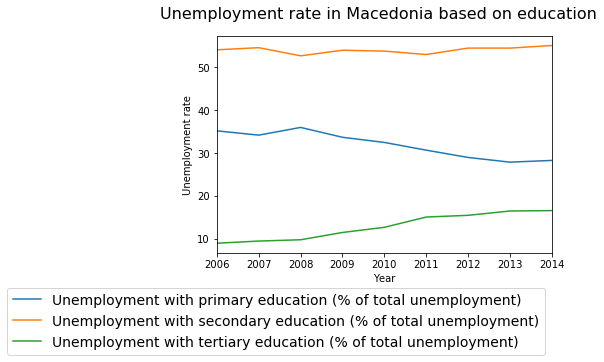

In [16]:
%matplotlib inline
macedonia = worldBankDataAnalysis1.loc[worldBankDataAnalysis1['Country Name'] == 'Macedonia, FYR']
macedonia1 = macedonia[['Year','Unemployment with primary education (% of total unemployment)','Unemployment with secondary education (% of total unemployment)','Unemployment with tertiary education (% of total unemployment)']]
macedonia1 = macedonia1.dropna() 
macedonia1.set_index('Year').plot()
plt.legend(loc='lower right', bbox_to_anchor=(1, -0.5), fontsize=14)
plt.ylabel('Unemployment rate')
plt.suptitle("Unemployment rate in Macedonia based on education", size=16)
plt.subplots_adjust(top=.88)
plt.savefig("analysis_2.3.png")

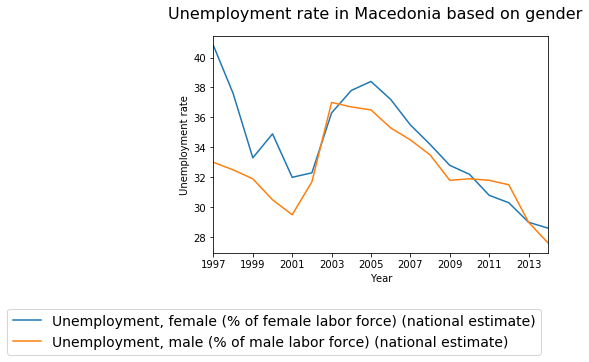

In [17]:
%matplotlib inline

macedonia[['Year','Unemployment, female (% of female labor force) (national estimate)','Unemployment, male (% of male labor force) (national estimate)']].set_index('Year').plot()
plt.legend(loc='lower right', bbox_to_anchor=(1, -0.5), fontsize=14)
plt.ylabel('Unemployment rate')
plt.suptitle("Un3employment rate in Macedonia based on gender", size=16)
plt.subplots_adjust(top=.88)
plt.savefig("analysis_2.4.png")

# Conclusion

- Based on the analysis, we find that Kuwait has the least unmployment rate and Macedonia has the maximum unemployment rate.
- Unemployment rate in Kuwait is maximum for people with secondary education 
- Unemployment rate in Kuwait is maximum for female as compared to men. 
- Unemployment rate in Macedonia is maximum for people with secondary education 
- Unemployment rate in Macedonia is maximum  for female as compared to men. 

